<h1>Progetto di Alessandro Arrighi per il corso di Laboratorio di Big Data, Data Mining e Data Analytics</h1>

<h2>Introduzione</h2>

L'analisi in questo documento si presta ad identificare negli anni l'adamento migratorio della popolazione residente in Italia. Qui infatti si andranno a diversificare le analisi sulla base di diversi fattori, come ad esempio l'età, il sesso o il paese di provenienza. Questo permette di comprendere più a fondo come, gli emigrati Italiani, si distribuiscano all'estero a seconda delle distinzioni utilizzate in fase di analisi.

<h2 style = "font-size: 25px;">Definizione dei dati</h2>
Per rendere più chiaro e comprensibile al lettore il funzionamento del data frame, viene riportata una lista con una breve definizione per ogni colonna presente nel dataframe che si utilizzerà in fase di analisi. Viene specificato per ogni colonna il suo significato generale, focalizzandosi poi sui possibili dati presenti al suo interno.
<ul>
<li>Paese di cittadinanza: Indica la cittadinanza del soggetto analizzato. Possono esservi solo due valori: 'Italia' (se di cittadinanza Italiana), 'Foreign country' (se di cittadinanza non Italiana, ma comunque residente in Italia)</li>
<li>Sesso: Indica il genere del soggetto analizzato. Possono esservi solo due valori: 'maschi' (se digenere maschile), 'femmine' (se di genere femminile)</li>
<li>Età: Indica l'età del soggetto analizzato. I valori attribuiti vengono divisi per range di età: 'fino a 17 anni' (per tutti i soggetti di età compresa tra 0 e 17 anni inclusi), '18-39 anni' (per tutti i soggetti di età compresa tra 18 e 39 anni inclusi), '40-64 anni' (per tutti i soggetti di età compresa tra 40 e 64 anni insclusi), '65 anni e più' (per tutti i soggetti di età superiore a 65 anni inclusi)</li>
<li>Stato di destinazione: Indica lo stato di destinazione del soggetto analizzato. I valori attribuiti comprendono tutti gli stati presenti nel mondo</li>
<li>Anno: Indica l'anno relativo alla tupla indicata, il range delle annate parte dal 2010 fino al 2022. La fonte utilizzata come riferimento, riporta dati con data massima 2022, mentre è stato deciso di riportare dati non antecedenti il 2010, al fine di mantenere una conformità dei dati relativa all'attuale periodo storico. Viene comunque utilizzato un range di dati sufficiente per effettuare diverse analisi significative</li>
<li>Numero di emigrati: Indica il numero di emigranti relativi la tupla indicata</li>
</ul>

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [421]:
filename = "./data.csv"

df = pd.read_csv(filename, sep = ',')
df.head(5)

,ITTER107_A,Territorio di origine,TIPO_DATO15,Tipo di indicatore demografico,ISO,Paese di cittadinanza,SEXISTAT1,Sesso,ETA1,Età,PAESI_B,Stato estero di destinazione,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,TDEREG,cancellati in anagrafe,FOR,Foreign country,2,femmine,Y_UN17,fino a 17 anni,CA,Canada,2010,2010,3,NaN,NaN
1,IT,Italia,TDEREG,cancellati in anagrafe,FOR,Foreign country,2,femmine,Y_UN17,fino a 17 anni,CA,Canada,2011,2011,8,NaN,NaN
2,IT,Italia,TDEREG,cancellati in anagrafe,FOR,Foreign country,2,femmine,Y_UN17,fino a 17 anni,CA,Canada,2012,2012,11,NaN,NaN
3,IT,Italia,TDEREG,cancellati in anagrafe,FOR,Foreign country,2,femmine,Y_UN17,fino a 17 anni,CA,Canada,2013,2013,9,NaN,NaN
4,IT,Italia,TDEREG,cancellati in anagrafe,FOR,Foreign country,2,femmine,Y_UN17,fino a 17 anni,CA,Canada,2014,2014,12,NaN,NaN


In [422]:
# Rimozione delle colonne non necessarie per l'analisi del dataframe

df = df.drop(columns = ['ITTER107_A', 'Territorio di origine', 'TIPO_DATO15', 'Tipo di indicatore demografico', 'ISO', 'SEXISTAT1', 'ETA1', 'PAESI_B', 'Seleziona periodo', 'Flag Codes', 'Flags'])
df.head(5)

,Paese di cittadinanza,Sesso,Età,Stato estero di destinazione,TIME,Value
0,Foreign country,femmine,fino a 17 anni,Canada,2010,3
1,Foreign country,femmine,fino a 17 anni,Canada,2011,8
2,Foreign country,femmine,fino a 17 anni,Canada,2012,11
3,Foreign country,femmine,fino a 17 anni,Canada,2013,9
4,Foreign country,femmine,fino a 17 anni,Canada,2014,12


In [423]:
# rinomina delle colonne del dataframe

df['Stato di destinazione'] = df['Stato estero di  destinazione']
df['Anno'] = df['TIME']
df['Numero di emigrati'] = df['Value']

df = df.drop(columns = ['Stato estero di  destinazione', 'TIME', 'Value'])
df.head(5)

,Paese di cittadinanza,Sesso,Età,Stato di destinazione,Anno,Numero di emigrati
0,Foreign country,femmine,fino a 17 anni,Canada,2010,3
1,Foreign country,femmine,fino a 17 anni,Canada,2011,8
2,Foreign country,femmine,fino a 17 anni,Canada,2012,11
3,Foreign country,femmine,fino a 17 anni,Canada,2013,9
4,Foreign country,femmine,fino a 17 anni,Canada,2014,12


In [424]:
# eliminazione delle tuple con valore == 'totale'

display(df[['Paese di cittadinanza']].groupby(by = 'Paese di cittadinanza').sum())
display(df[['Sesso']].groupby(by = 'Sesso').sum())
display(df[['Età']].groupby(by = 'Età').sum())

df = df[df['Paese di cittadinanza'] != 'Totale']
df = df[df['Sesso'] != 'totale']
df = df[df['Età'] != 'totale']

display(df[['Paese di cittadinanza']].groupby(by = 'Paese di cittadinanza').sum())
display(df[['Sesso']].groupby(by = 'Sesso').sum())
display(df[['Età']].groupby(by = 'Età').sum())

""
Paese di cittadinanza
Foreign country
Italia
Totale


""
Sesso
femmine
maschi
totale


""
Età
18-39 anni
40-64 anni
65 anni e più
fino a 17 anni
totale


""
Paese di cittadinanza
Foreign country
Italia


""
Sesso
femmine
maschi


""
Età
18-39 anni
40-64 anni
65 anni e più
fino a 17 anni


In [425]:
display(df[df['Stato di destinazione'] == 'Mondo'].head())

# elimino tutte le tuple aventi come valore dell'attributo 'Stato di destinazione' un continente. Così si ottiene un dataframe senza ripetizioni
remove = ['Mondo', 'America', 'Europa', 'Africa', 'Asia', 'Unione europea 27', 'Extra Ue27']
for x in remove:
    df = df[df['Stato di destinazione'] != x]

,Paese di cittadinanza,Sesso,Età,Stato di destinazione,Anno,Numero di emigrati
9561,Foreign country,maschi,18-39 anni,Mondo,2010,6437
9562,Foreign country,maschi,18-39 anni,Mondo,2011,7144
9563,Foreign country,maschi,18-39 anni,Mondo,2012,8822
9564,Foreign country,maschi,18-39 anni,Mondo,2013,9196
9565,Foreign country,maschi,18-39 anni,Mondo,2014,10156


In [426]:
df[df['Stato di destinazione'] == 'Mondo']

,Paese di cittadinanza,Sesso,Età,Stato di destinazione,Anno,Numero di emigrati


In [427]:
df.head(5)

,Paese di cittadinanza,Sesso,Età,Stato di destinazione,Anno,Numero di emigrati
0,Foreign country,femmine,fino a 17 anni,Canada,2010,3
1,Foreign country,femmine,fino a 17 anni,Canada,2011,8
2,Foreign country,femmine,fino a 17 anni,Canada,2012,11
3,Foreign country,femmine,fino a 17 anni,Canada,2013,9
4,Foreign country,femmine,fino a 17 anni,Canada,2014,12


<h2 style = "font-size: 25px">Analisi dei dati</h2>

<h3 style = "font-size: 18px">Numero di emigrati per anno</h3>

Come prima analisi viene graficato il numero di emigrati dall'Italia all'estero divisi per anno. Si può infatti notare come l'andamento del fenomeno migratorio Italiano sia crescente con il passare degli anni fino all'arrivo del 2016. Dopo un leggero calo di emigrazioni nei due anni successivi, si può notare un aumento nel 2019 con un successivo calo negli anni a seguire.

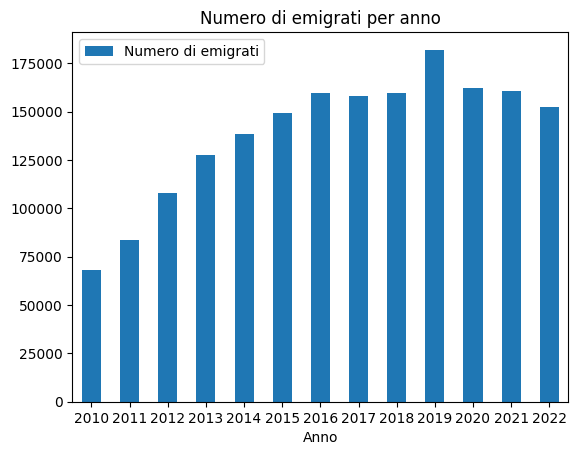

In [428]:
# Numero di emigrati per ogni anno
tot = df.groupby(by = "Anno").sum('Numero di emigrati')
tot.plot(kind = "bar", rot = 0)
plt.title('Numero di emigrati per anno')
plt.show()

<h3 style = "font-size: 18px">Emigrati di età tra 18 e 39 anni</h3>

In questo grafico viene raffigurato il numero di emigrati di età compresa tra 18 e 39 anni; qui l'andamento migratorio risulato similare all'andamento totale di tutti gli emigrati. Infatti nel secondo grafico, che raffigura l'andamento migratorio con un grafico a linea, sì può notare come la percentuale di emigrati sia similare al varaire dell'annata, circa il 50% degli emigrati totali. Pertanto l'andamento numerico dei migrati si avvicina fortemente all'andamento totale.
Con questo grafico si ottengono risultati significativi, poiché circa la metà dei migranti, risulta essere in giovane età lavorativa.

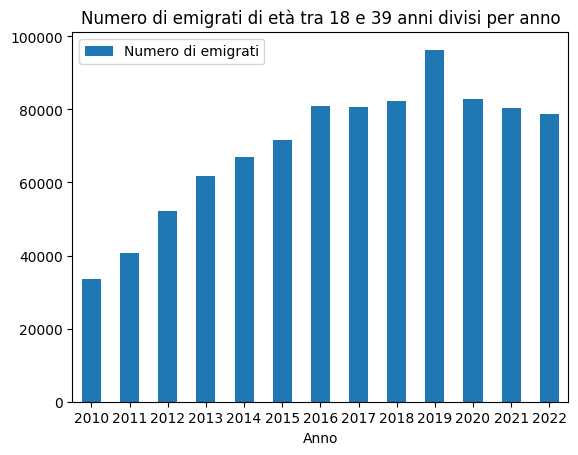

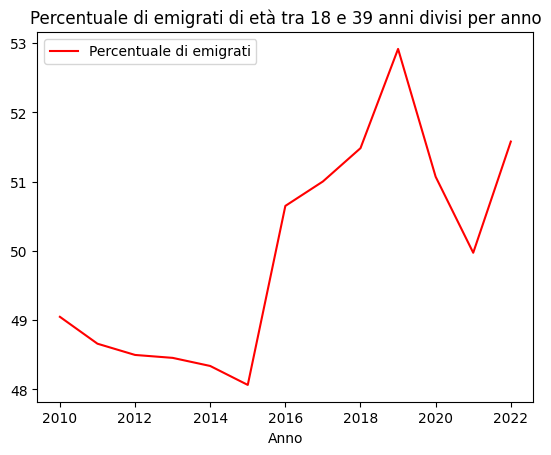

In [429]:
# Numero di emigrati con età compresa tra 18 e 39 anni
età_compresa = df[df['Età'] == '18-39 anni'].groupby(by = 'Anno').sum('Numero di emigrati')
età_compresa.plot(kind = 'bar', rot = 0).legend(['Numero di emigrati'])
plt.title('Numero di emigrati di età tra 18 e 39 anni divisi per anno')
plt.show()

# Percentuale di emigrati tra 18 e 39 anni
((età_compresa / tot) * 100).plot(kind = 'line', color = 'red', rot = 0).legend(['Percentuale di emigrati'])
plt.title('Percentuale di emigrati di età tra 18 e 39 anni divisi per anno')
plt.show()

<h3 style = "font-size: 18px">Emigrati di cittadinanza Italiana ed Estera</h3>

In questo grafico viene riportato l'andamento degli emigrati divisi per il paese di cittadinanza (Italiani o Stranieri). Si può notare come il numero di emigrati Italiani sia fortemente superiore rispetto al numero di stranieri. Infatti visionando il grafico nello specifico, possiamo notare come dal 2015/2016 fino al 2020 circa, la percentuale di Italiani rispetto agli emigrati stranieri sia fortemente superiore.

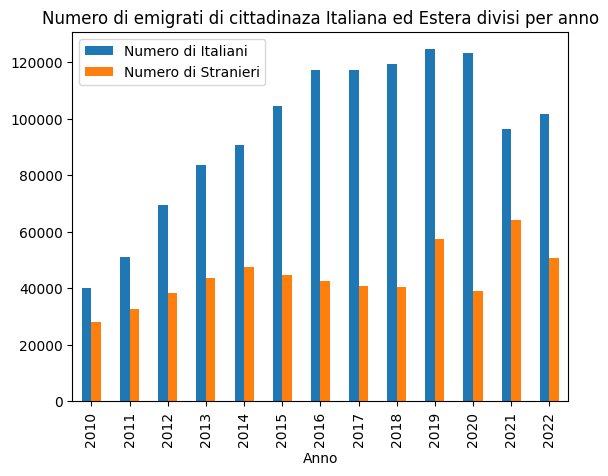

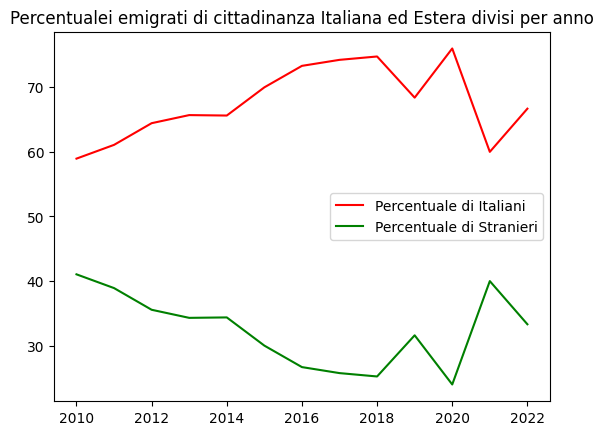

In [430]:
# Numero di emigrati di cittadinanza Italiana e Straniera
ita = df[df['Paese di cittadinanza'] == 'Italia'].groupby(by = "Anno").sum('Numero di emigrati')
foreign = df[df['Paese di cittadinanza'] == 'Foreign country'].groupby(by = "Anno").sum('Numero di emigrati')

merge = pd.merge(ita, foreign, on = 'Anno')
merge.plot(kind = 'bar').legend(['Numero di Italiani', 'Numero di Stranieri'])
plt.title('Numero di emigrati di cittadinaza Italiana ed Estera divisi per anno')
plt.show()

# Percentuale degli emigrati di cittadinanza Italiana e Straniera
plt.plot((ita / tot) * 100, 'red', (foreign / tot) * 100, 'green')
plt.legend(['Percentuale di Italiani', 'Percentuale di Stranieri'])
plt.title('Percentuale di emigrati di cittadinanza Italiana ed Estera divisi per anno')
plt.show()

<h3 style = "font-size: 18px">Emigrati di età tra 18 e 39 anni di cittadinanza Italiana ed Estera</h3>

Qui i dati sono ancora più significativi, poiché la maggioranza dei giovani tra 18 e 39 anni emigrati, risulta essere di cittadinanza Italiana. Come si può notare nel grafico a torta, quasi 75% degli emigrati dal 2010 fino al 2022 è di cittadinanza Italiana.

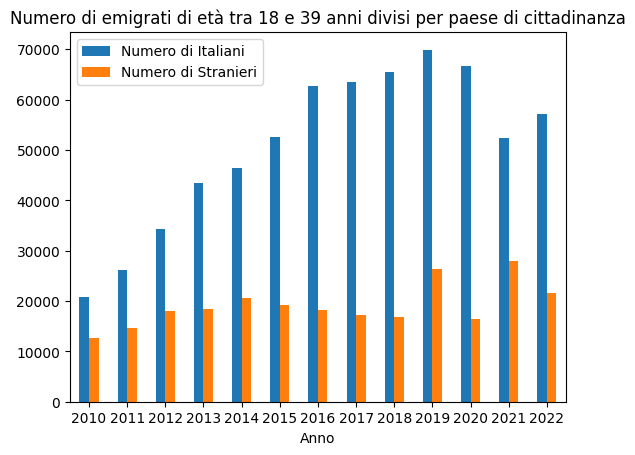

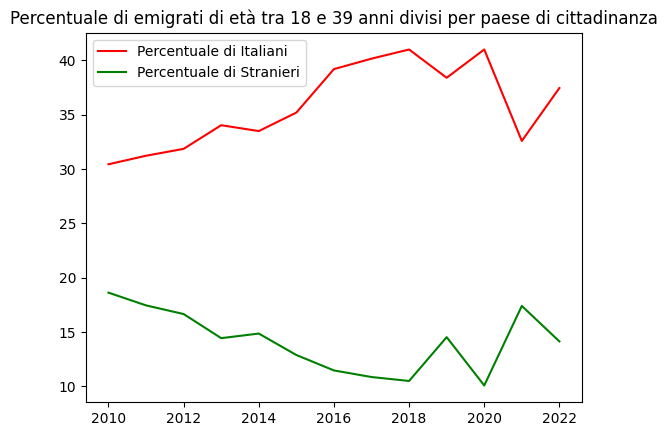

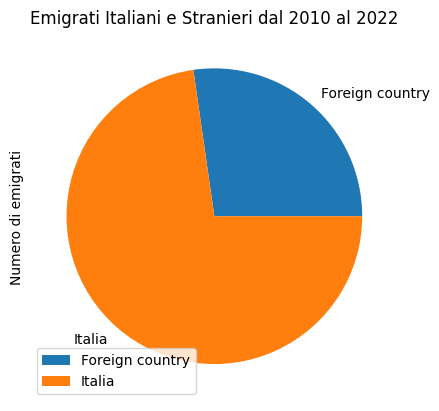

In [431]:
# Numero di emigrati di età compresa tra 18 e 39 anni di cittadinanza Italiana ed Estera
ita = df.loc[(df['Età'] == '18-39 anni') & (df['Paese di cittadinanza'] == 'Italia')].groupby(by = "Anno").sum('Numero di emigrati')# / ita) * 100).plot(title = 'Percentuale sul totale degli emigrati Italiani', kind = 'line', legend = False)
foreign = df.loc[(df['Età'] == '18-39 anni') & (df['Paese di cittadinanza'] == 'Foreign country')].groupby(by = "Anno").sum('Numero di emigrati')# / tot) * 100).plot(title = 'Percentulae sul totale degli emigrati', kind = 'line', legend = False)

merge = pd.merge(ita, foreign, on = 'Anno')
merge.plot(kind = 'bar', rot = 0)
plt.legend(['Numero di Italiani', 'Numero di Stranieri'])
plt.title('Numero di emigrati di età tra 18 e 39 anni divisi per paese di cittadinanza')
plt.show()

# Percentuali per i soggetti di età compresa tra 18 e 39 anni di cittadinanza Italiana ed Estera
plt.plot((ita / tot) * 100, 'red', (foreign / tot) * 100, 'green')
plt.legend(['Percentuale di Italiani', 'Percentuale di Stranieri'])
plt.title('Percentuale di emigrati di età tra 18 e 39 anni divisi per paese di cittadinanza')
plt.show()

# Percentuale di tutti gli emigrati dal 2010 al 2022 divisi per paese di cittadinanza
df[df['Età'] == '18-39 anni'].groupby(by = 'Paese di cittadinanza').sum('Numero di emigrati').plot.pie(y = 'Numero di emigrati')
plt.title('Emigrati Italiani e Stranieri dal 2010 al 2022')
plt.show()

<h3 style = "font-size: 18px">Emigrati suddivisi per genere</h3>

In questa porzione di analisi, viene focalizzato l'andamento migratorio in base al genere dei soggeti emigranti. Qui si può notare come l'andamento sia similare, non vi è una forte disuguaglianza di genere. Il grafico a linea ci porta all'attenzione una diminuzione della disparità all'aumentare delle annate.

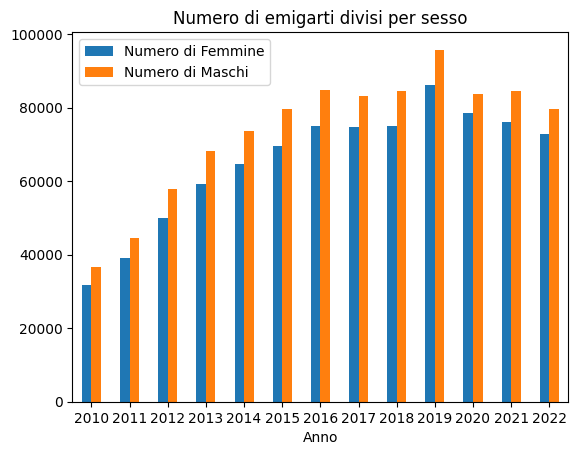

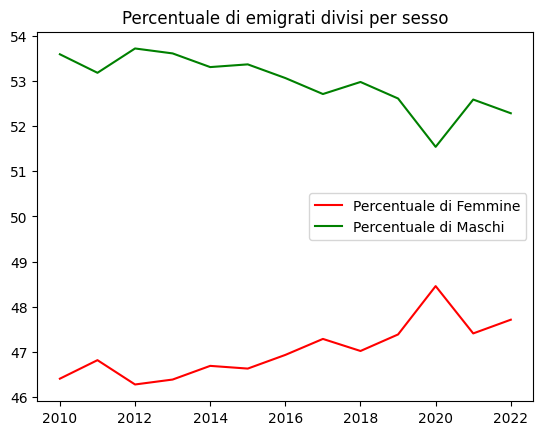

In [432]:
# numero di emigrati divisi per sesso
femmine = df[df['Sesso'] == 'femmine'].groupby(by = 'Anno').sum('Numero di emigrati')
maschi = df[df['Sesso'] == 'maschi'].groupby(by = 'Anno').sum('Numero di emigrati')
merge = pd.merge(femmine, maschi, on = 'Anno')
merge.plot(kind = 'bar', rot = 0).legend(['Numero di Femmine', 'Numero di Maschi'])
plt.title('Numero di emigarti divisi per sesso')
plt.show()

# percentuali di emigrati divisi per sesso
plt.plot((femmine / tot) * 100, 'red', (maschi / tot) * 100, 'green')
plt.legend(['Percentuale di Femmine', 'Percentuale di Maschi'])
plt.title('Percentuale di emigrati divisi per sesso')
plt.show()

<h3 style = "font-size: 18px">Emigrati suddivisi per genere di età tra 18 e 39 anni</h3>

In questo grafico, si può individuare un andamento leggermente differente rispetto all'andamento totale per genere. Si può notare come l'andamento sia più altalenante nel tempo, con una maggioranza di emigrazione, anche se non elevata, dei soggetti maschi

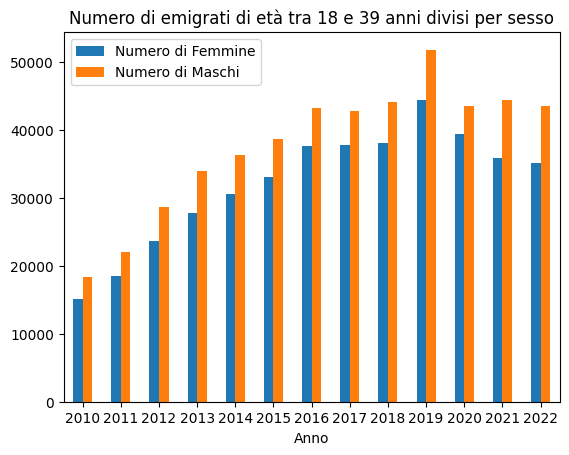

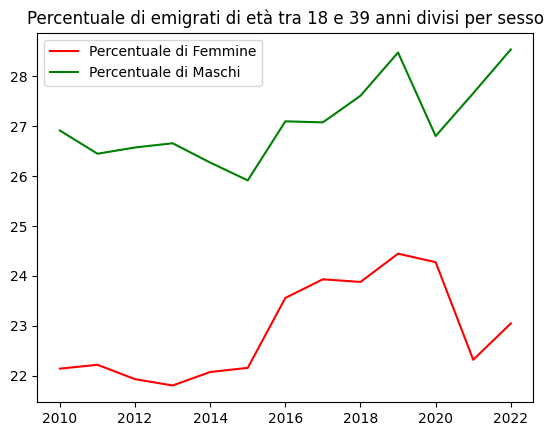

In [433]:
# numero di emigrati in età compresa tra 18-39 anni divisi per genere
femmine = df.loc[(df['Sesso'] == 'femmine') & (df['Età'] == '18-39 anni')].groupby(by = 'Anno').sum('Numero di emigrati')
maschi = df.loc[(df['Sesso'] == 'maschi') & (df['Età'] == '18-39 anni')].groupby(by = 'Anno').sum('Numero di emigrati')
merge = pd.merge(femmine, maschi, on = 'Anno')
merge.plot(kind = 'bar', rot = 0).legend(['Numero di Femmine', 'Numero di Maschi'])
plt.title('Numero di emigrati di età tra 18 e 39 anni divisi per sesso')
plt.show()

# percentuali di emigrati in età compresa tra 18-39 anni divisi per genere
plt.plot((femmine / tot) * 100, 'red', (maschi / tot) * 100, 'green')
plt.legend(['Percentuale di Femmine', 'Percentuale di Maschi'])
plt.title('Percentuale di emigrati di età tra 18 e 39 anni divisi per sesso')
plt.show()

<h3 style = "font-size: 18px">Emigrati divisi per genere e paese di cittadinanza nel 2022</h3>

In questo grafico rimane per entrambi i sessi una forte maggioranza di emigranti Italiani, ma nel caso di cittadinanza straniera risultano essere di numero maggiore le femmine rispetto ai maschi. Risulta essere curioso come dato poiché ci si sarebbe aspettato un grafico con andamento similare all'andamento del grafico diviso per genere.

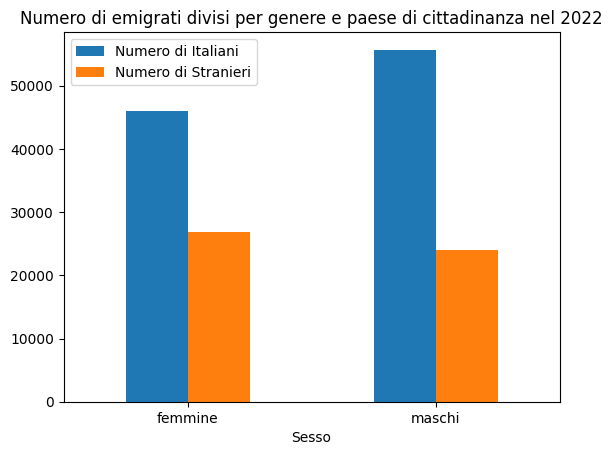

In [434]:
tmp = df[df['Anno'] == 2022]
ita = tmp[tmp['Paese di cittadinanza'] == 'Italia'].groupby(by = 'Sesso').sum('Numero di emigrati')
foreign = tmp[tmp['Paese di cittadinanza'] == 'Foreign country'].groupby(by = 'Sesso').sum('Numero di emigrati')
merge = pd.merge(ita, foreign, on = 'Sesso')
merge[['Numero di emigrati_x', 'Numero di emigrati_y']].plot(kind = 'bar', rot = 0).legend(['Numero di Italiani', 'Numero di Stranieri'])
plt.title('Numero di emigrati divisi per genere e paese di cittadinanza nel 2022')
plt.show()

<h3 style = "font-size: 18px">Emigrati di età tra 18 e 39 anni, divisi per genere e paese di provenienza</h3>

In questo grafico risulta una forte maggioranza di emigrati Italiani per entrambi i sessi ed un numero superiore per i soggetti maschi.

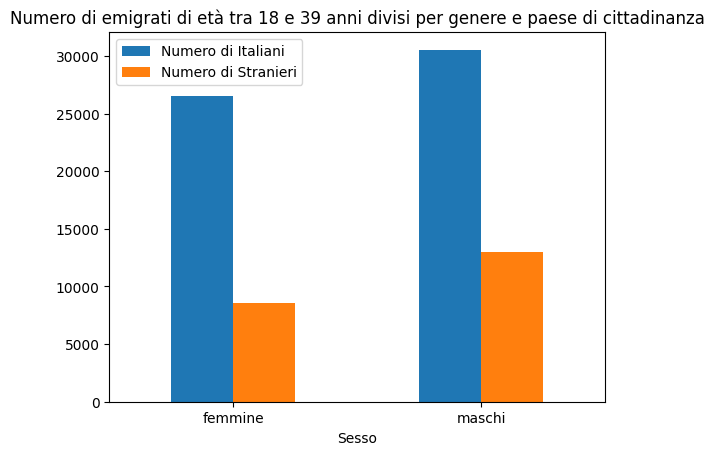

In [435]:
ita = tmp.loc[(tmp['Paese di cittadinanza'] == 'Italia') & (tmp['Età'] == '18-39 anni')].groupby(by = 'Sesso').sum('Numero di emigrati')
foreign = tmp.loc[(tmp['Paese di cittadinanza'] == 'Foreign country') & (tmp['Età'] == '18-39 anni')].groupby(by = 'Sesso').sum('Numero di emigrati')
merge = pd.merge(ita, foreign, on = 'Sesso')
merge[['Numero di emigrati_x', 'Numero di emigrati_y']].plot(kind = 'bar', rot = 0).legend(['Numero di Italiani', 'Numero di Stranieri'])
plt.title('Numero di emigrati di età tra 18 e 39 anni divisi per genere e paese di cittadinanza')
plt.show()

<h3 style = "font-size: 18px">Stati più gettonati per emigrare nel 2022</h3>

Viene preso in analisi l'andamento migratorio suddivisio per stati. Qui è possibile notare come i primi stati con più emigrati siano tutti stati Europei.

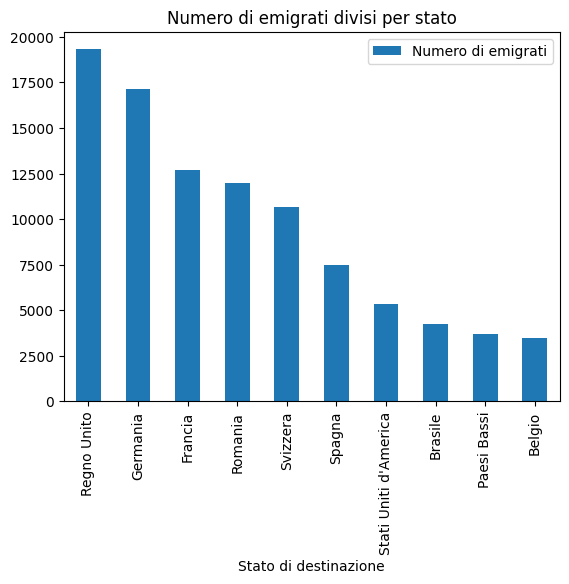

In [436]:
nations = df.loc[df['Anno'] == 2022, ['Stato di destinazione', 'Numero di emigrati']].groupby(by = "Stato di destinazione").sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
nations.head(10).plot(kind = 'bar')
plt.title('Numero di emigrati divisi per stato')
plt.show()

<h3 style = "font-size: 18px">Stati più gettonati per emigrare nel 2022 da emigranti di età tra 18 e 39 anni</h3>

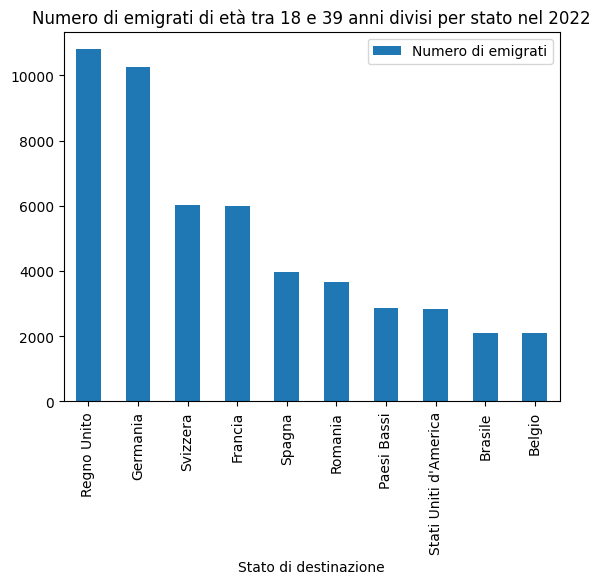

In [437]:
nations = df.loc[(df['Età'] == '18-39 anni') & (df['Anno'] == 2022)].groupby(by = "Stato di destinazione").sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False).head(10)
nations[['Numero di emigrati']].plot(kind = 'bar')
plt.title('Numero di emigrati di età tra 18 e 39 anni divisi per stato nel 2022')
plt.show()

<h3 style = "font-size: 18px">Emigrati Italiani e Stranieri nei 10 stati più gettonati nel 2022</h3>

In questa analisi è possibile figurare come si dispongono nei vari stati, il numero e la percentuale di emigrati Italiani e Stranieri. E' possibile individuare come in quasi tutti gli stati, la maggior parte di emigrati siano di cittadinanza Italiana, tranne per la Romania che risiede tra gli stati più gettonati con una percentuale di emigrati Stranieri oltre l'80%

In [438]:
# funzione creata per utilizzare in fase di analisi una porzione di dataframe secondo lo stesso ordine
def order(df1, df2):
    df1['Value'] = tot['Numero di emigrati']
    df2['Value'] = tot['Numero di emigrati']
    merge = pd.merge(df1, df2, on = 'Stato di destinazione')
    merge = merge.sort_values(by = 'Value_x', ascending = False)
    merge = merge[['Numero di emigrati_x', 'Numero di emigrati_y']]
    return merge

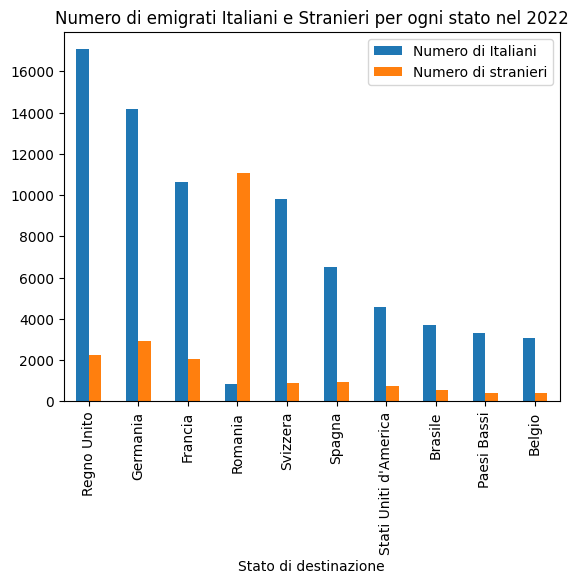

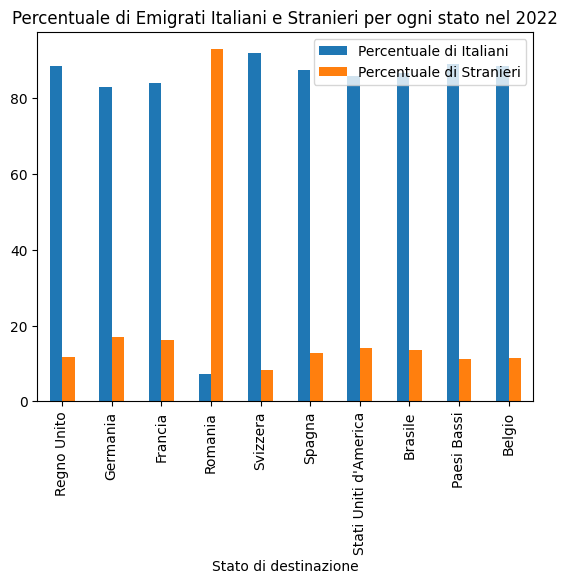

In [443]:
# Numero di emigrati
tot = df[df['Anno'] == 2022].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
foreign = df.loc[(df['Anno'] == 2022) & (df['Paese di cittadinanza'] == 'Foreign country')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
ita = df.loc[(df['Anno'] == 2022) & (df['Paese di cittadinanza'] == 'Italia')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
merge = order(ita, foreign)
merge[['Numero di emigrati_x', 'Numero di emigrati_y']].head(10).plot(kind = 'bar').legend(['Numero di Italiani', 'Numero di stranieri'])
plt.title('Numero di emigrati Italiani e Stranieri per ogni stato nel 2022')
plt.show()

# Percentuale di emigrati
ita = (ita / tot) * 100
foreign = (foreign / tot) * 100
merge = order(ita, foreign)
merge.head(10).plot(kind = 'bar').legend(['Percentuale di Italiani', 'Percentuale di Stranieri'])
plt.title('Percentuale di Emigrati Italiani e Stranieri per ogni stato nel 2022')
plt.show()

<h3 style = "font-size: 18px">Emigrati Italiani e stranieri di età compresa fra 18 e 39 anni nei 10 stati più gettonati del 2022</h3>

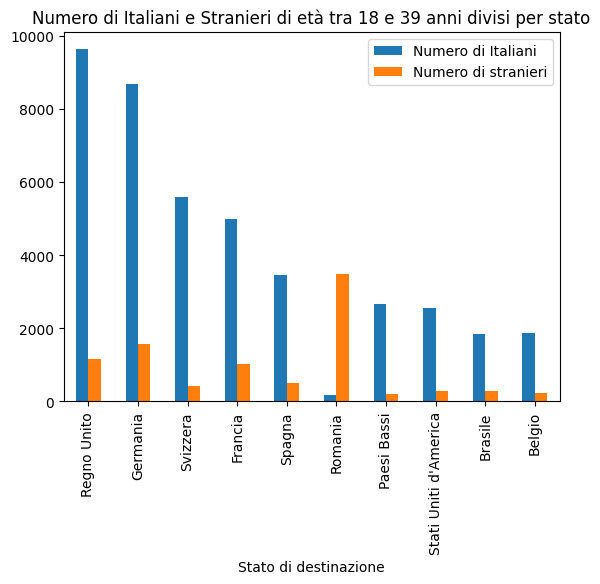

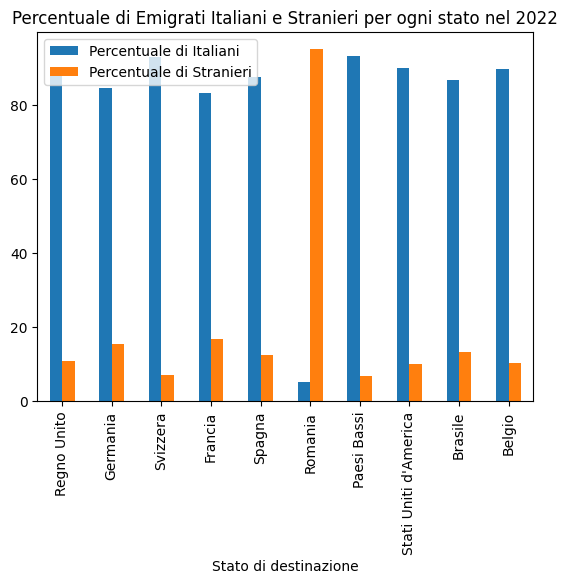

In [440]:
# Numero di emigrati
tot = df.loc[(df['Anno'] == 2022) & (df['Età'] == '18-39 anni')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
foreign = df.loc[(df['Anno'] == 2022) & (df['Età'] == '18-39 anni') & (df['Paese di cittadinanza'] == 'Foreign country')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
ita = df.loc[(df['Anno'] == 2022) & (df['Età'] == '18-39 anni') & (df['Paese di cittadinanza'] == 'Italia')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
merge = order(ita, foreign)
merge.head(10).plot(kind = 'bar').legend(['Numero di Italiani', 'Numero di stranieri'])
plt.title('Numero di Italiani e Stranieri di età tra 18 e 39 anni divisi per stato')
plt.show()

# Percentuale di emigrati
ita = (ita / tot) * 100
foreign = (foreign / tot) * 100
merge = order(ita, foreign)
merge.head(10).plot(kind = 'bar').legend(['Percentuale di Italiani', 'Percentuale di Stranieri'])
plt.title('Percentuale di Emigrati Italiani e Stranieri per ogni stato nel 2022')
plt.show()

<h3 style = "font-size: 18px">Emigrati divisi per genere nei 10 stati più gettonati del 2022</h3>

L'analisi qui riportata, indica che l'emigrazione di Machi e Femmine non risulta essere estremamente differente nei diversi stati più gettonati. E' possibile visionare solo una leggera differenza del 10% circa tra maschi e femmine emigrati in Romania.

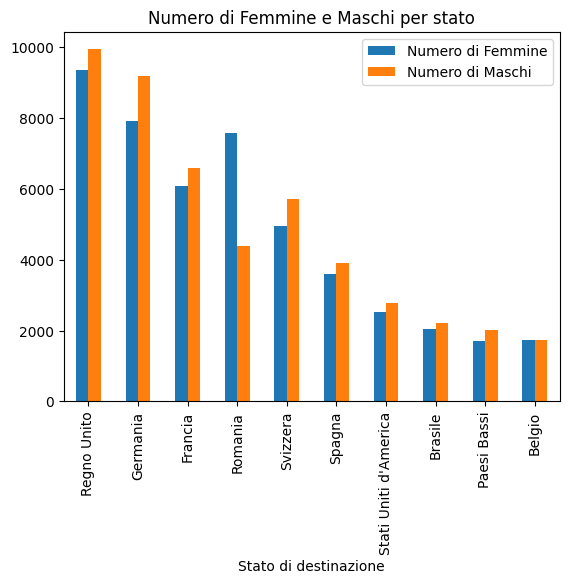

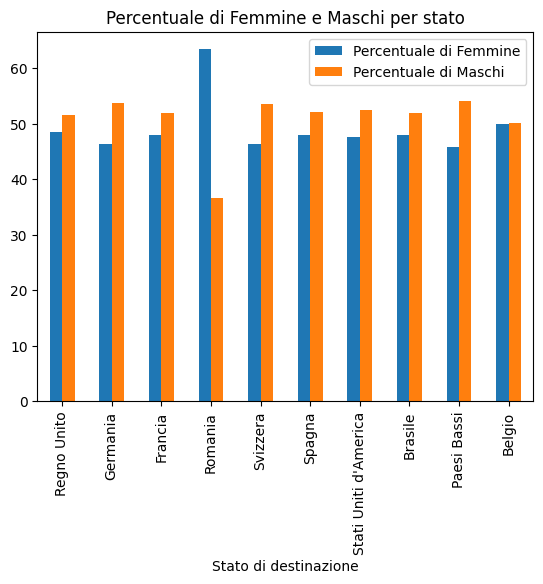

In [446]:
# Numero di emigrati
tot = df[df['Anno'] == 2022].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
femmine = df.loc[(df['Sesso'] == 'femmine') & (df['Anno'] == 2022)].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
maschi = df.loc[(df['Sesso'] == 'maschi') & (df['Anno'] == 2022)].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
merge = order(femmine, maschi)
merge.head(10).plot(kind = 'bar').legend(['Numero di Femmine', 'Numero di Maschi'])
plt.title('Numero di Femmine e Maschi per stato')
plt.show()

# Percentuale di emigrati
femmine = (femmine / tot) * 100
maschi = (maschi / tot) * 100
merge = order(femmine, maschi)
merge.head(10).plot(kind = 'bar').legend(['Percentuale di Femmine', 'Percentuale di Maschi'])
plt.title('Percentuale di Femmine e Maschi per stato')
plt.show()

<h3 style = "font-size: 18px">Emigrati in età compresa tra 18 e 39 anni divisi per genere nei 10 stati più gettonanti del 2022</h3>

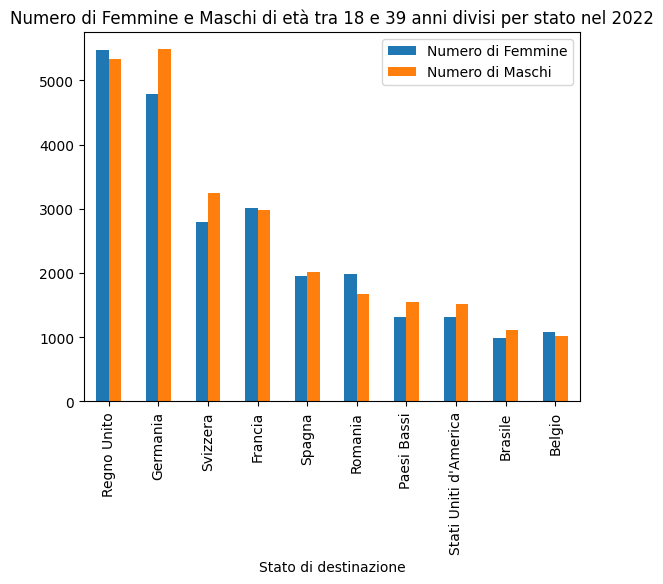

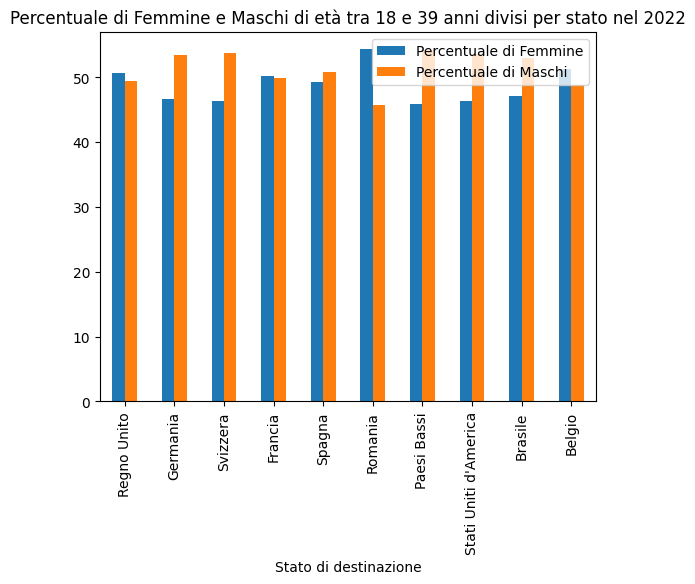

In [442]:
# Numero di emigrati
tot = df.loc[(df['Anno'] == 2022) & (df['Età'] == '18-39 anni')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
femmine = df.loc[(df['Sesso'] == 'femmine') & (df['Anno'] == 2022) & (df['Età'] == '18-39 anni')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
maschi = df.loc[(df['Sesso'] == 'maschi') & (df['Anno'] == 2022) & (df['Età'] == '18-39 anni')].groupby(by = 'Stato di destinazione').sum('Numero di emigrati').sort_values(by = 'Numero di emigrati', ascending = False)
merge = order(femmine, maschi)
merge.head(10).plot(kind = 'bar').legend(['Numero di Femmine', 'Numero di Maschi'])
plt.title('Numero di Femmine e Maschi di età tra 18 e 39 anni divisi per stato nel 2022')
plt.show()

# Percentuale di emigrati
femmine = (femmine / tot) * 100
maschi = (maschi / tot) * 100
merge = order(femmine, maschi)
merge.head(10).plot(kind = 'bar').legend(['Percentuale di Femmine', 'Percentuale di Maschi'])
plt.title('Percentuale di Femmine e Maschi di età tra 18 e 39 anni divisi per stato nel 2022')
plt.show()

<h3>Link Utili: </h3>

Fonte utilizzata come riferimento: http://dati.istat.it/Index.aspx?QueryId=19749 </br>
Repository di github: https://github.com/alessandroArrighi/Progetto-BigData.git </br>
Indirizzo e-mail: alessandro.arrighi2@studio.unibo.it </br>